In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa
import statsmodels.tsa.arima.model as arima_model
import warnings
warnings.filterwarnings("ignore")

In [3]:
def plotds(xt, nlag=30, fig_size=(12, 10)):
    
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf = plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    
    return None

In [4]:
n = 600

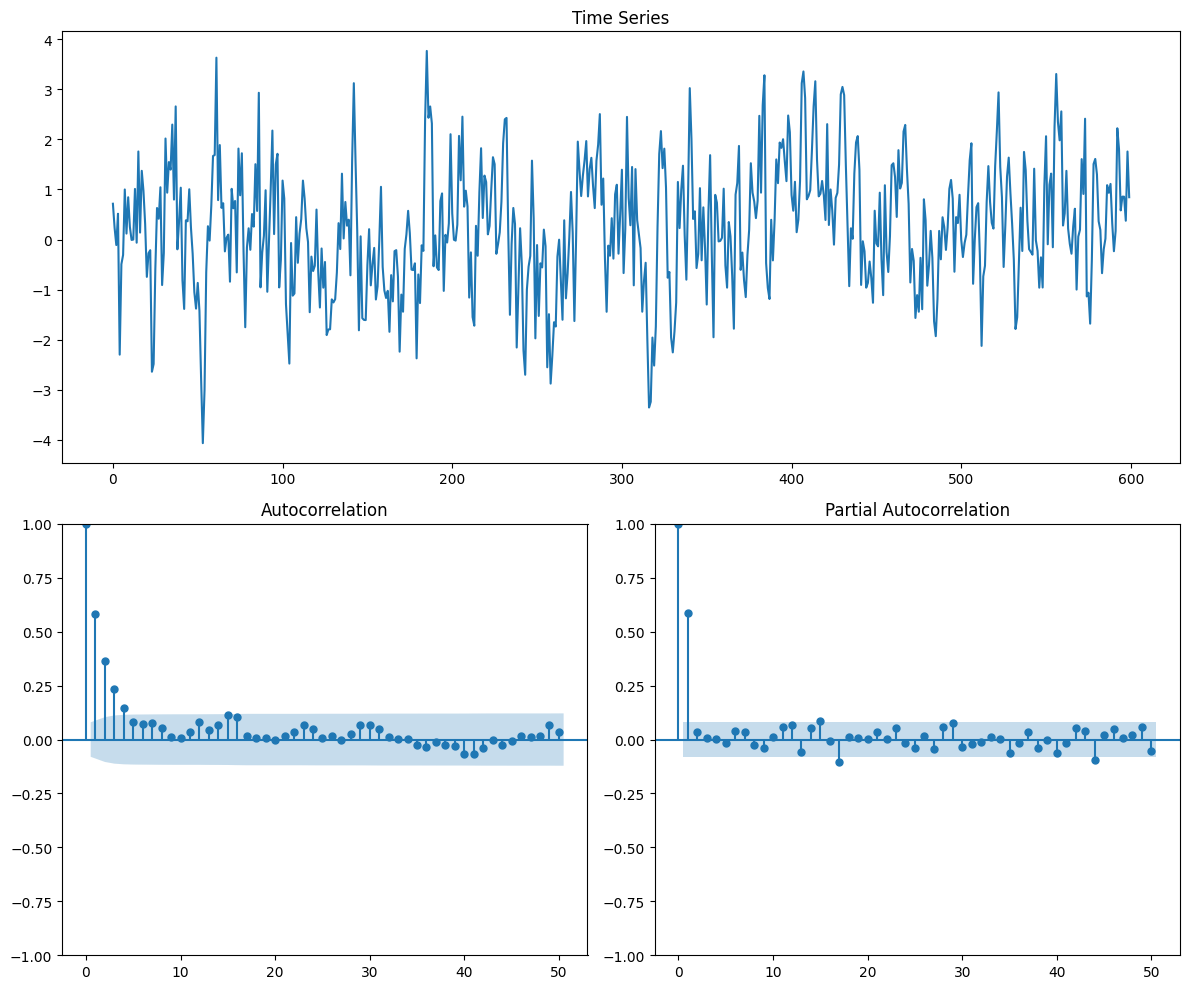

In [5]:
ar = np.r_[1, -0.6]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

La antigua grafica es para dar a conocer si existe estacionariedad o no. Se puede decir que esta serie es estacionaria porque se evidencia un decrecimiento en la correlacion y se convierte en una funcion sinusoidal. 

A su vez la autocorrelacion parcial tiene como funcion entregar el orden del componente autorregresivo. Al minimizar el AIC implica que se maximiza la funcion de verosimilitud. 

Por ello el grafico ACF decrece exponencialmente y la PACF remueve el efecto de rezago mientras calcula la correlacion, es necesario saber que solo los terminos significativos son capturados. 

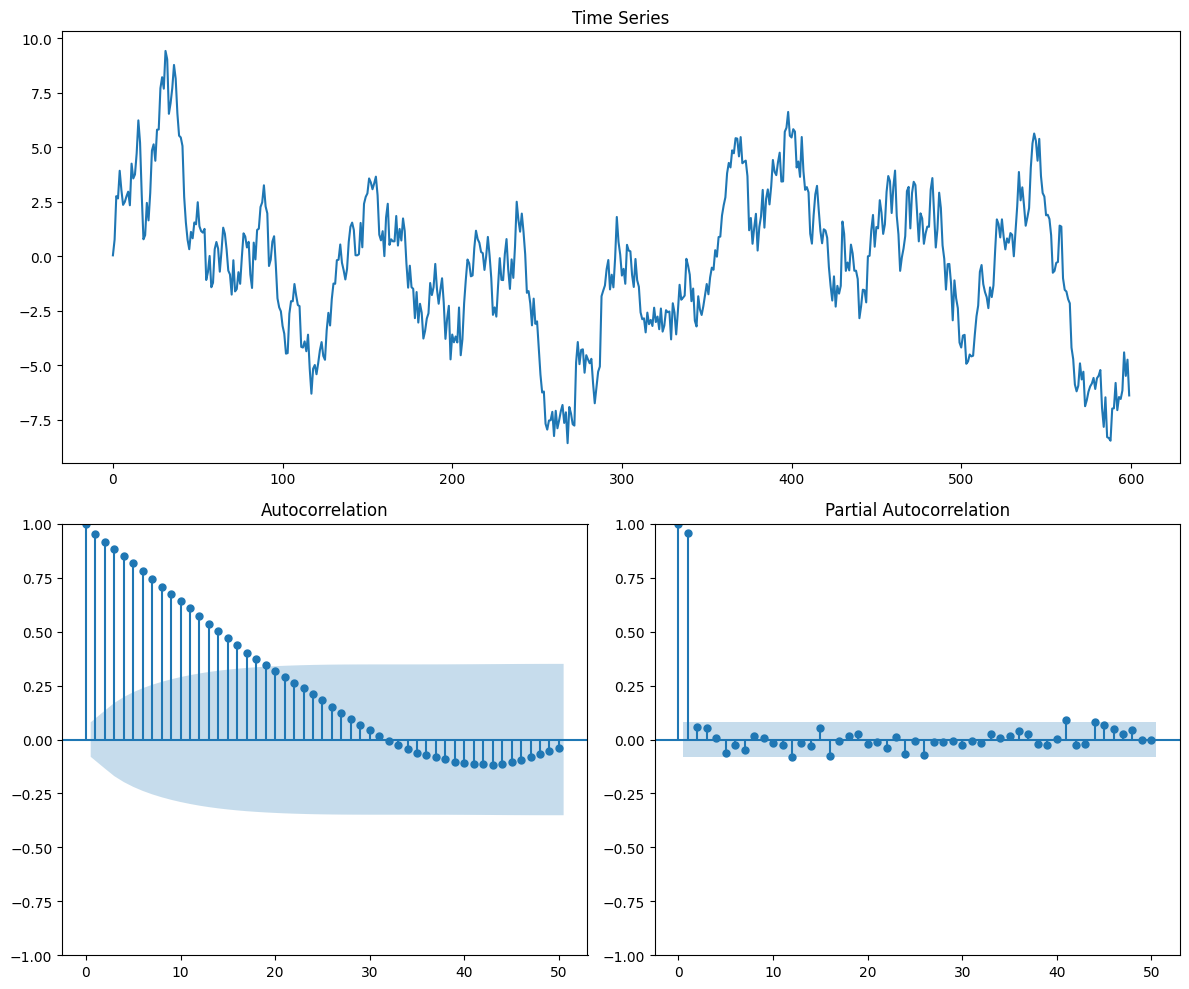

In [6]:
ar = np.r_[1, -0.95]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

La componente aitorregresiva se ve marcada en el grafico de las tendencias en la funcion de autocorrelacion, en el segundo grafico se ve un decaimiento aqui esta tendencia es mas lenta. 
se establece una breve sospecha de no estacionariedad. 
Para ello esto se da en phi>1, en esta parte el modelo se convierte en no estaionario. 



#Ejemplo del proceso no estacionario con $\phi>1$ 

Para ello se toma un $\phi=1.01$

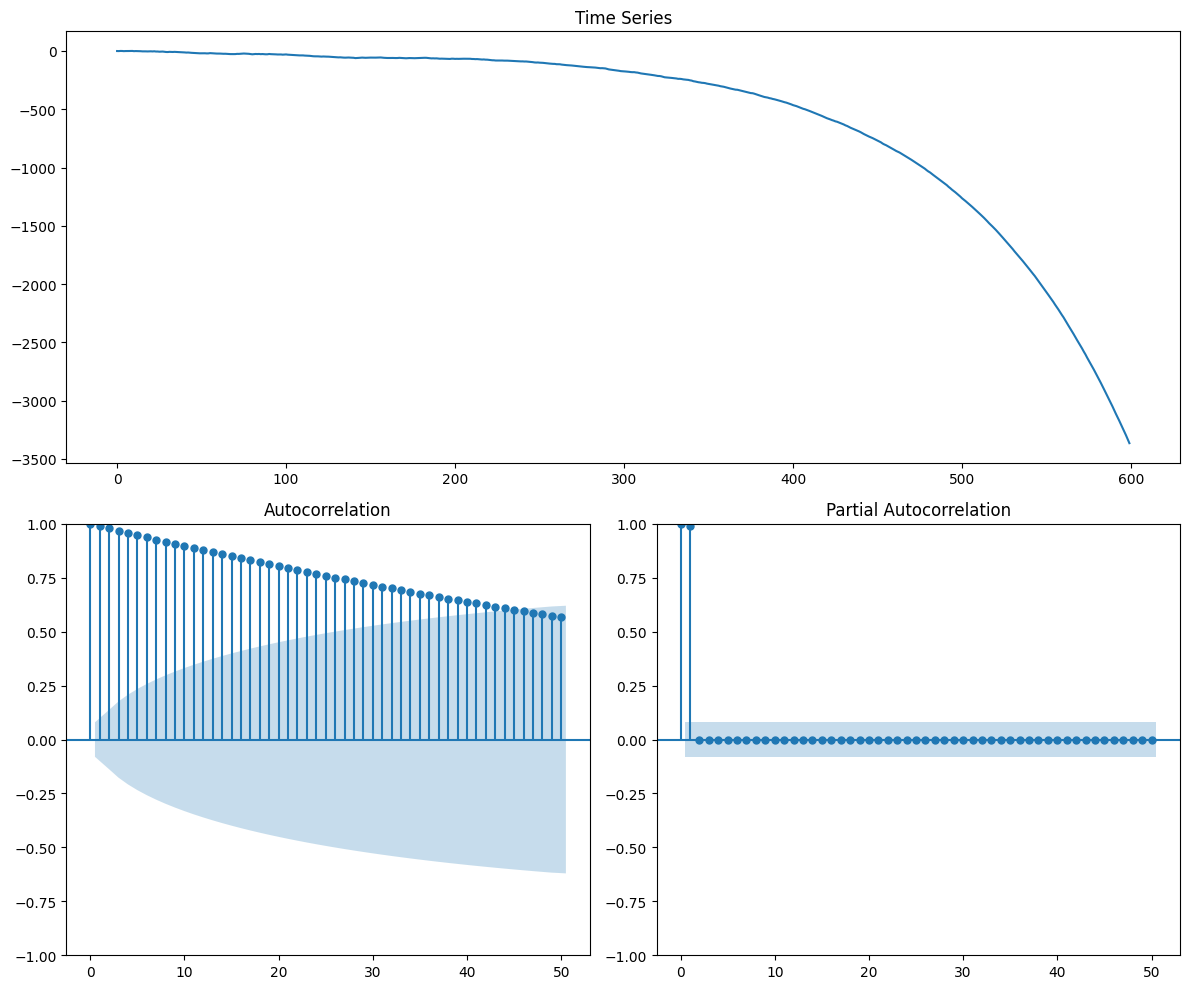

In [7]:
ar = np.r_[1, -1.01]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

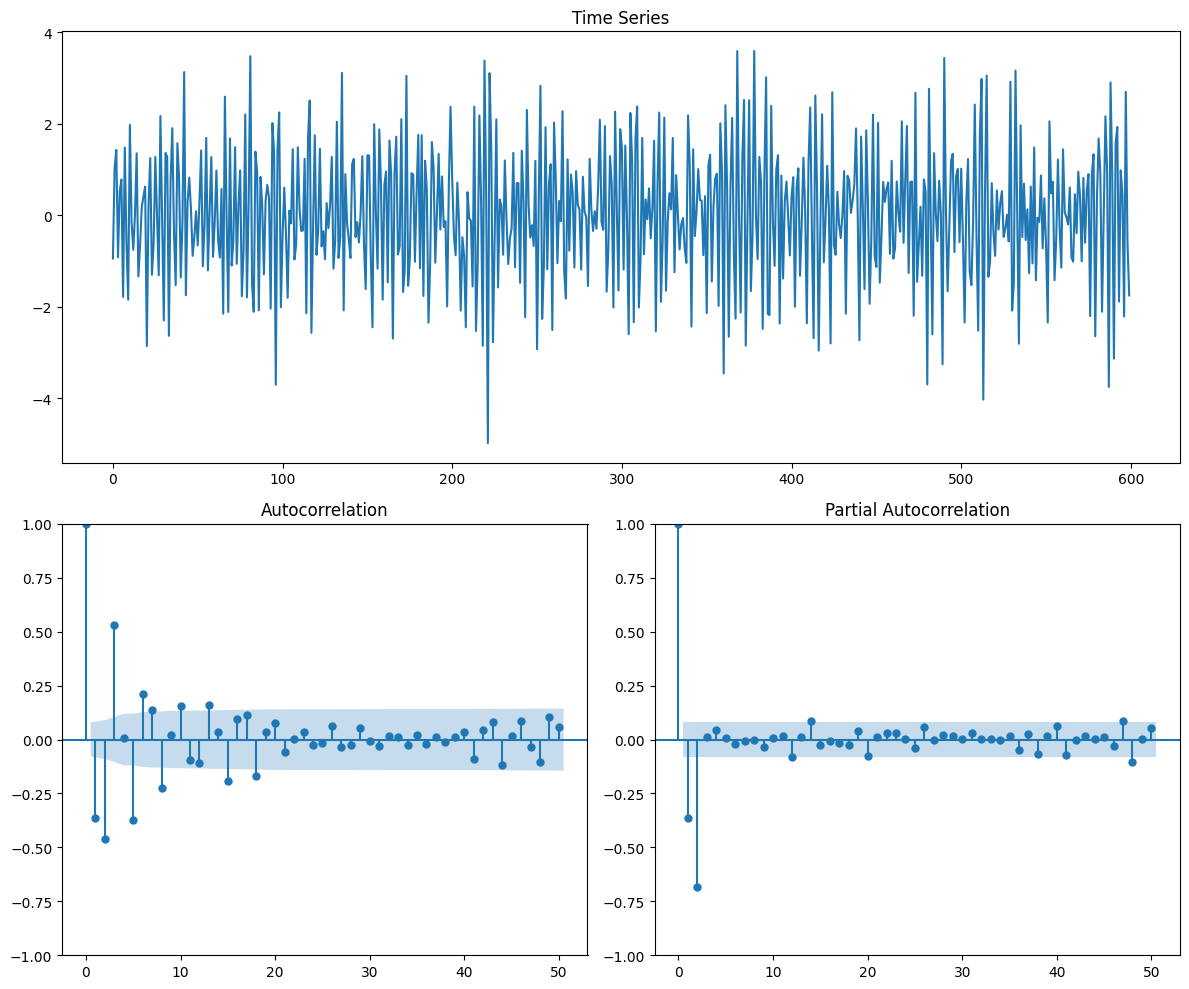

In [8]:
ar = np.r_[1, 0.6, 0.7]
ma = np.r_[1, 0]
ar2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar2_data)

Los modelos autorregresivos de alto orden, pueden ser generados para validar efecto sobre los componentes de la PACF con el orden.
En la grafica anterior se visualiza el conjunto de datos con componentes AR2 y AR3 al ser generados. 
 

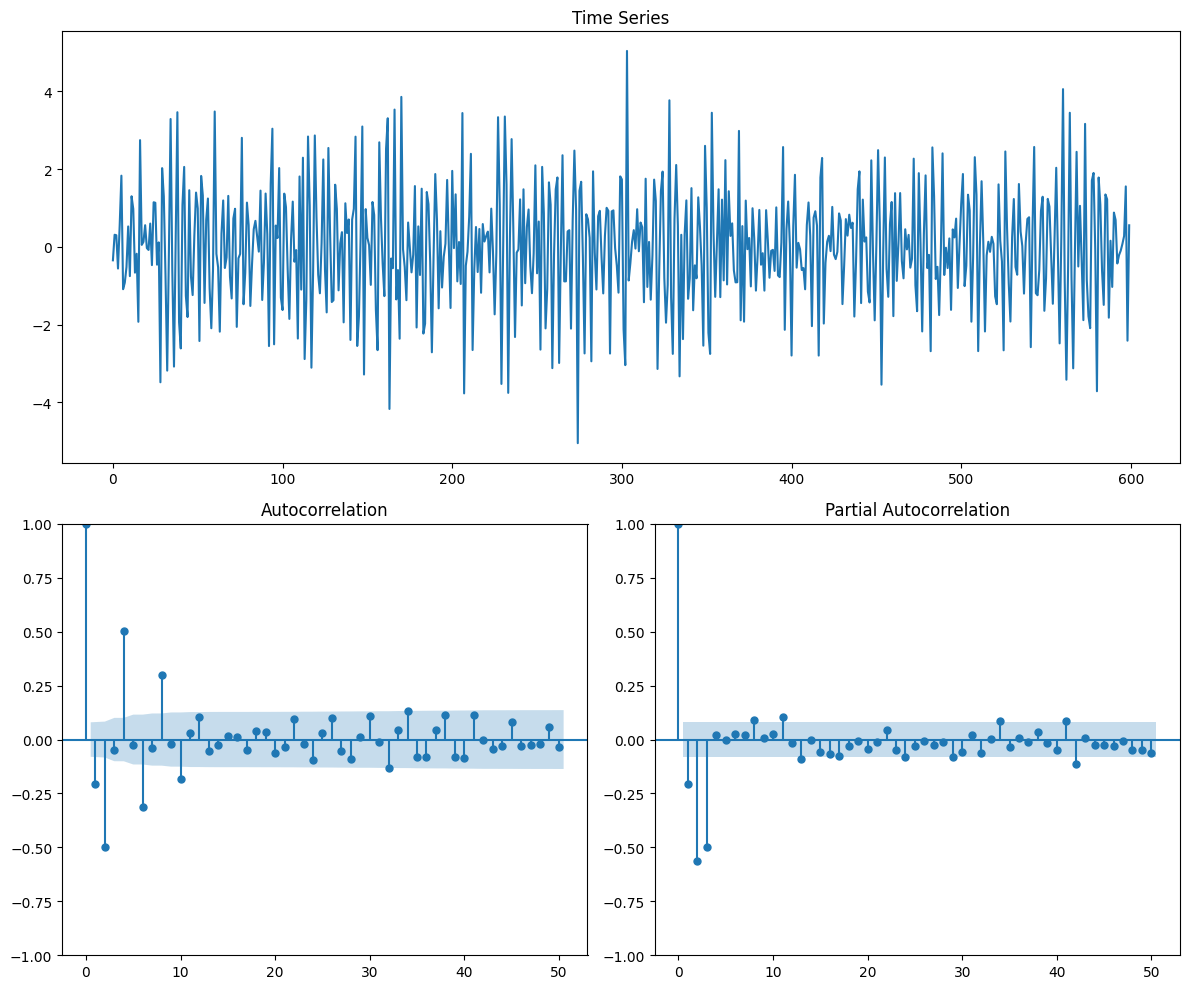

In [9]:
ar = np.r_[1, 0.6, 0.7, 0.5]
ma = np.r_[1, 0]
ar3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar3_data)

En esta parte la funcion de autocorrelacion trata de ser oscilatoria.

Se ven movimientos bruscos de tercer orden. Los conjuntos de datos con componente AR2 y AR3 se evidencian en la anterior visualizacion. 

##Creacion de un modelo autorregresivo de orden 3 simulado. 

In [10]:
ar3 = arima_model.ARIMA(ar3_data.tolist(), order=(3, 0, 0)).fit()
ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -893.865
Date:                Sun, 16 Apr 2023   AIC                           1797.729
Time:                        01:58:53   BIC                           1819.714
Sample:                             0   HQIC                          1806.288
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0117      0.016     -0.746      0.455      -0.042       0.019
ar.L1         -0.5973      0.034    -17.467      0.000      -0.664      -0.530
ar.L2         -0.7191      0.031    -23.385      0.000      -0.779      -0.659
ar.L3         -0.4934      0.033    -14.891      0.000      -0.558      -0.428
sigma2         1.1490      0.066     17.498      0.000       1.020       1.278
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.77   Prob(JB):                         0.81
Heteroskedasticity (H):               0.77   Skew:                            -0.03
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Al momento de ajustar los modelos se puede aumentar la verosimilitud agregando los parametros. Si este proceso se realiza se puede decir que se establecio un sobreajuste. El BIC y el AIC intentan resolver este tipo de problemas introduciendo un termino por el numero de parametros del modelo. 


En esta parte se da a conocer que hay 600 observaciones. El AIC y el BIC son los coeficientes que se calculan con el numero de parametros que se necesitan y la funcion de verosimilitud. 


JB es un test de normalidad para los residuales. 
La hipotesis es que los residuales estan normalmente distribuidos. 
Tambien el sesgo y la curtosis muestran un sesgo negativo en los residuales y una distribucion con mayor concentracion de los datos con base en la media. 

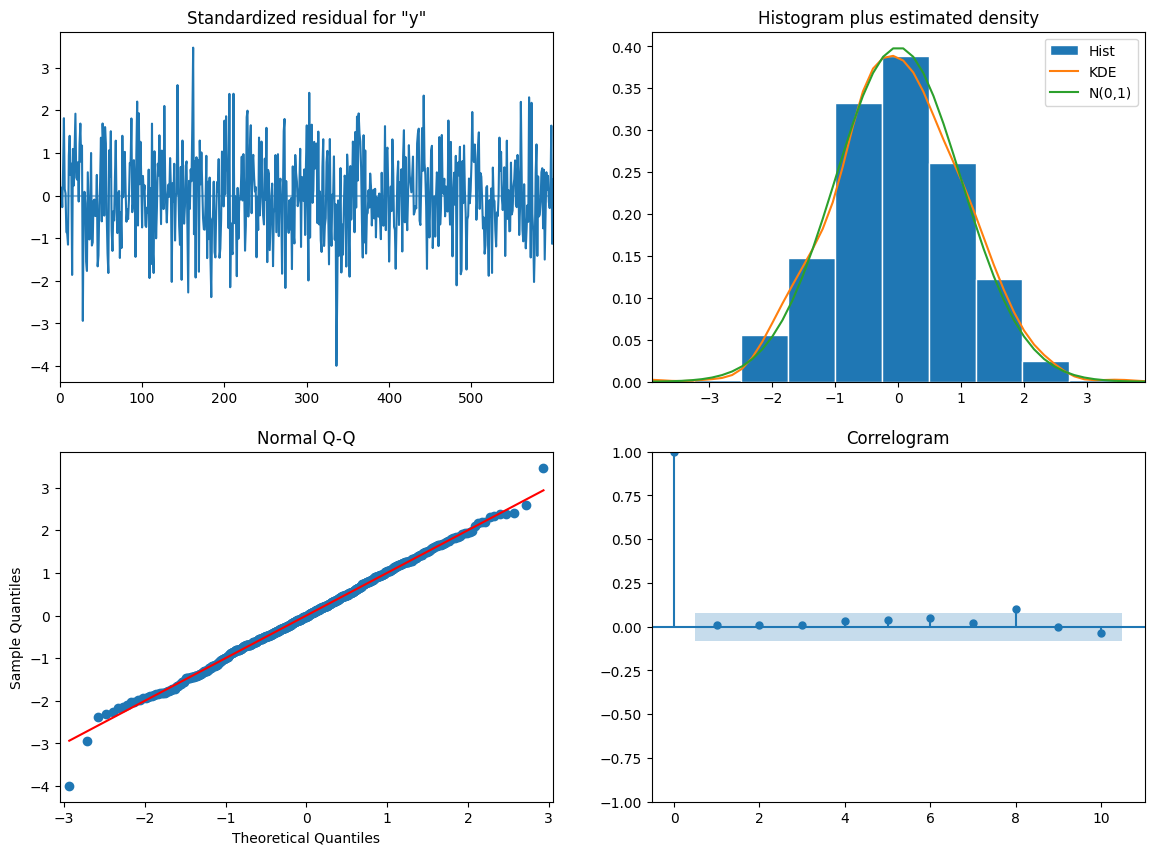

In [11]:
ar3.plot_diagnostics(figsize=(14,10));

Normalidad e independencia para los residules con sesgo hacia la derecha 

1. La varianza va cambiando en el tiempo. 
2. En el ACF no hay correlaciones significativas, por lo que los residuos son independientes. 
3. Ninguna de las correlaciones son significativas. 

Por lo que se concluye que el modelo cumple los supuestos de la independencia de los residuos. 


#Modelos de media movil.

Para realizar visualizaciones de un modelo de media movil se genera una señal haciendo uso del siguiente codigo:

In [12]:
import statsmodels.tsa.api as smtsa

In [13]:
n = 600

Se genera un conjunto de datos para MA1

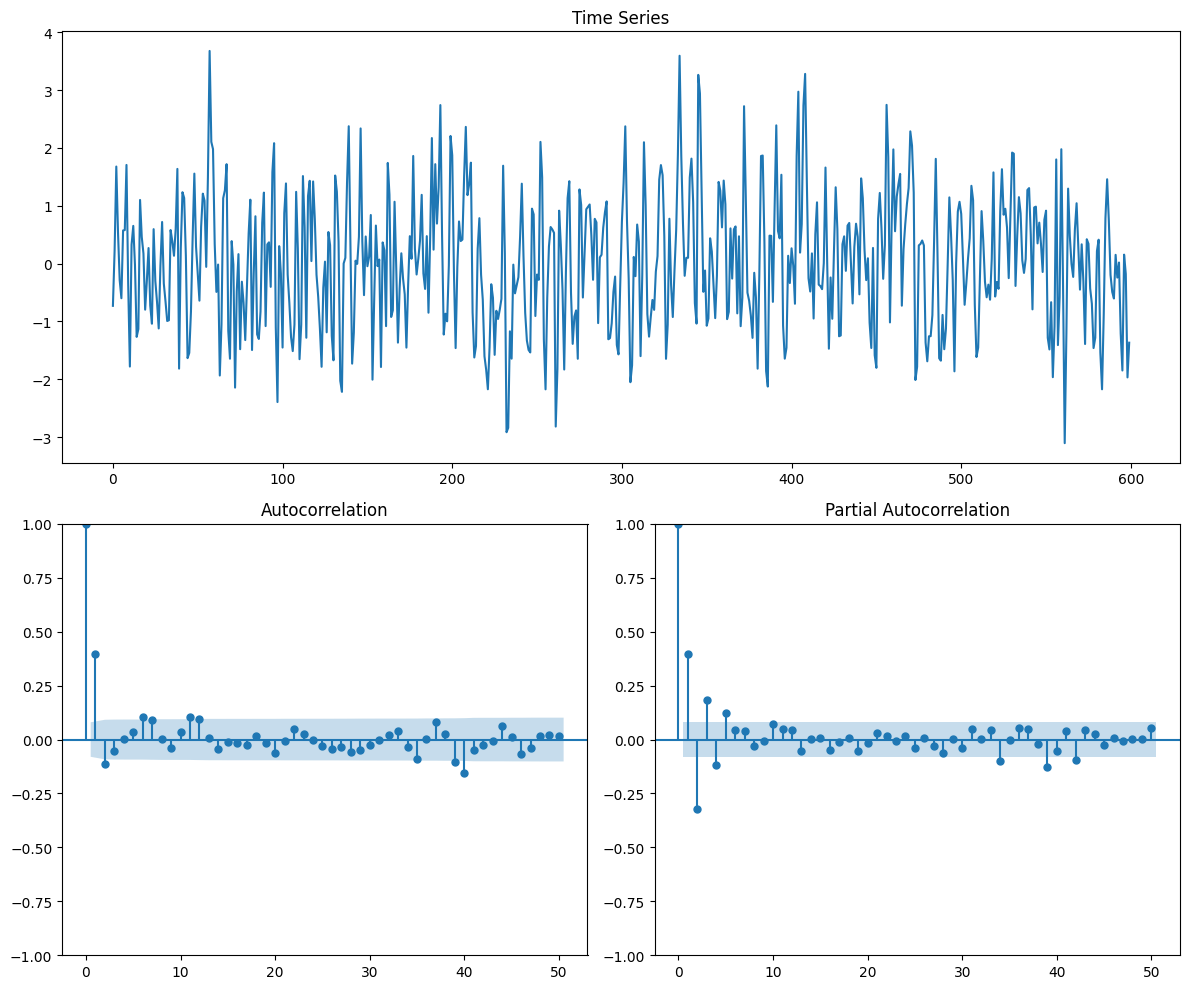

In [14]:
ar = np.r_[1, 0]
ma = np.r_[1, 0.7]
ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)
plotds(ma1_data)

En esta parte se tiene en cuenta la funcion AR, esta muestra una significancia en la segunda correlacion. Por ello se hara uso de un modelo de medias moviles de orden 1. 

A continuacion se calcula la banda de confianza para la autocorrelacion. 

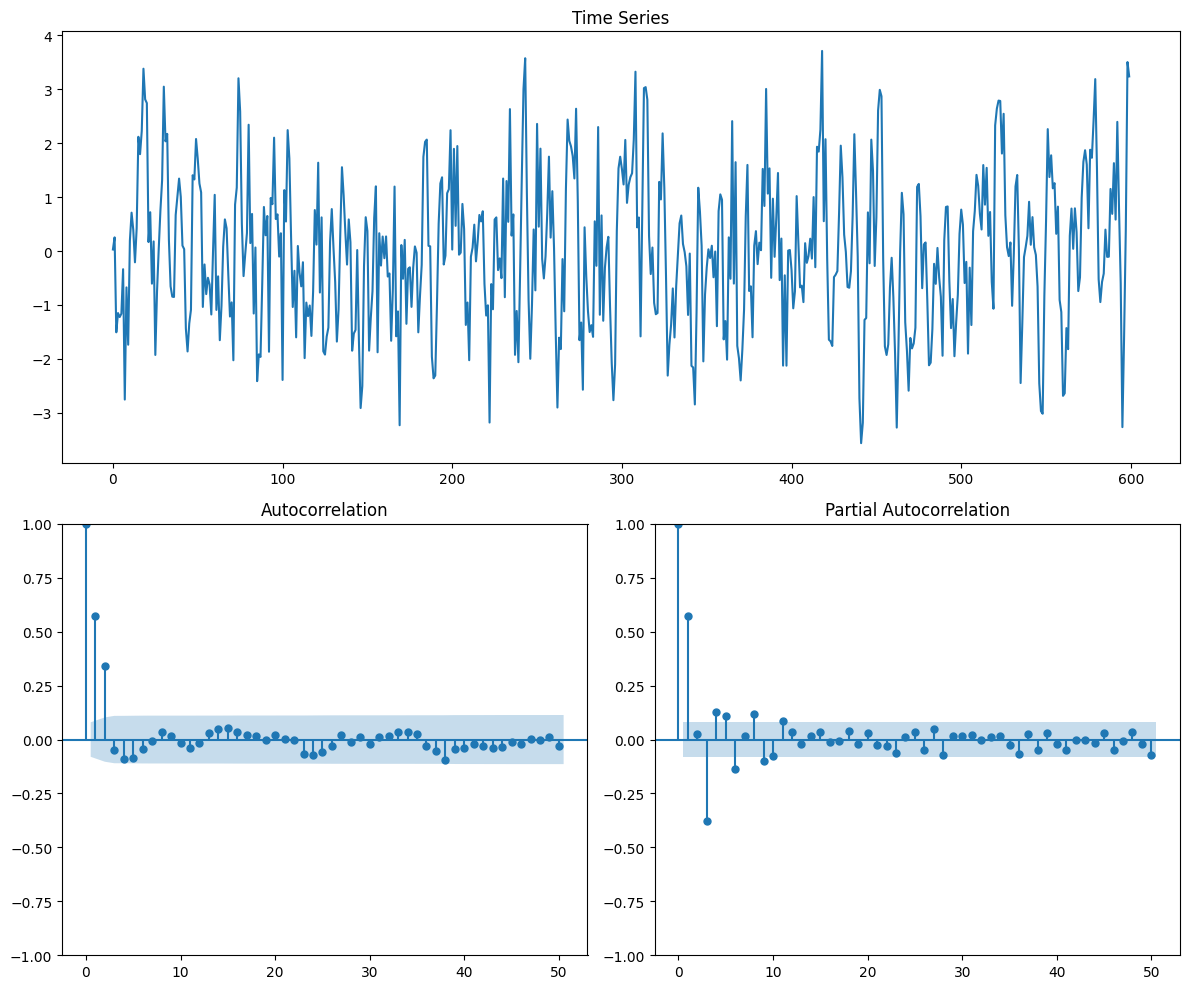

In [15]:
ar = np.r_[1, 0]
ma = np.r_[1, 0.6, 0.7]
ma2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)
plotds(ma2_data)

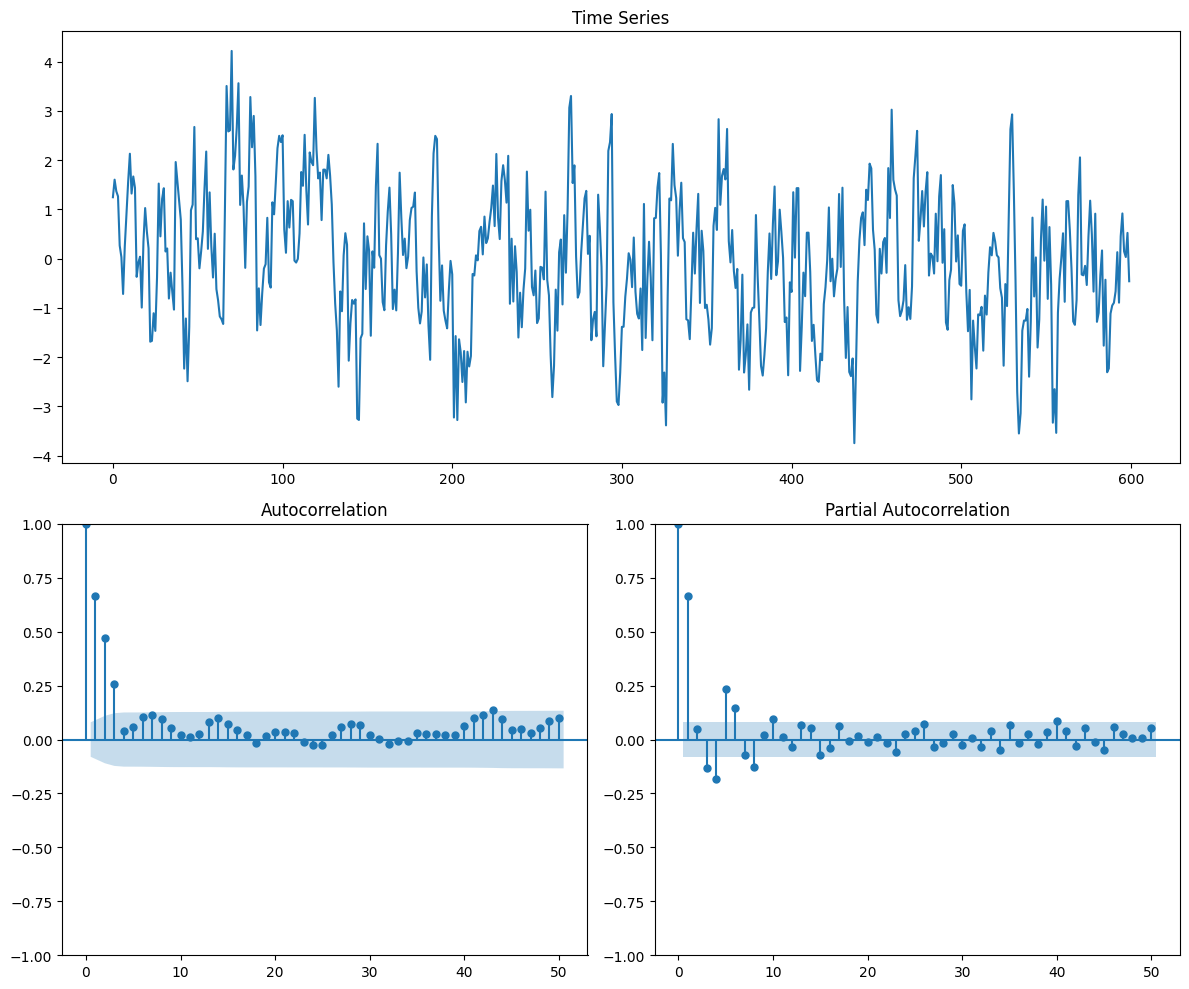

In [16]:
ar = np.r_[1, 0]
ma = np.r_[1, 0.6, 0.7, 0.5]
ma3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)
plotds(ma3_data)

El coeficiente de media movil cada vez se proxima a 0.7. 

##A continuacion se ajusta un modelo MA1 

In [17]:
ma1 = smtsa.ARIMA(ma1_data.tolist(), order=(0, 0, 1)).fit()

In [18]:
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -832.808
Date:                Sun, 16 Apr 2023   AIC                           1671.617
Time:                        01:59:00   BIC                           1684.807
Sample:                             0   HQIC                          1676.752
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0266      0.066      0.405      0.685      -0.102       0.155
ma.L1          0.6536      0.032     20.660      0.000       0.592       0.716
sigma2         0.9391      0.054     17.428      0.000       0.834       1.045
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):                 0.74
Prob(Q):                              0.44   Prob(JB):                         0.69
Heteroskedasticity (H):               0.82   Skew:                             0.08
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ejecutamos el modelo para el conjunto de datos MA3 y el resultado se muestra a continuación

In [19]:
ma3 = smtsa.ARIMA(ma3_data.tolist(), order=(0, 0, 3)).fit()

In [20]:
ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -827.275
Date:                Sun, 16 Apr 2023   AIC                           1664.551
Time:                        01:59:01   BIC                           1686.535
Sample:                             0   HQIC                          1673.109
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0371      0.112     -0.332      0.740      -0.256       0.182
ma.L1          0.6265      0.033     19.080      0.000       0.562       0.691
ma.L2          0.6665      0.035     18.916      0.000       0.597       0.736
ma.L3          0.5033      0.038     13.389      0.000       0.430       0.577
sigma2         0.9206      0.050     18.308      0.000       0.822       1.019
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 3.12
Prob(Q):                              0.87   Prob(JB):                         0.21
Heteroskedasticity (H):               1.00   Skew:                            -0.11
Prob(H) (two-sided):                  0.99   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Creacion de datos con ARIMA

Vamos a generar un conjunto de datos ARMA (1,1)
actualizando el script utilizado anteriormente con componentes AR y MA actualizados. También restringiremos el número de muestras a 600 para simplificar:

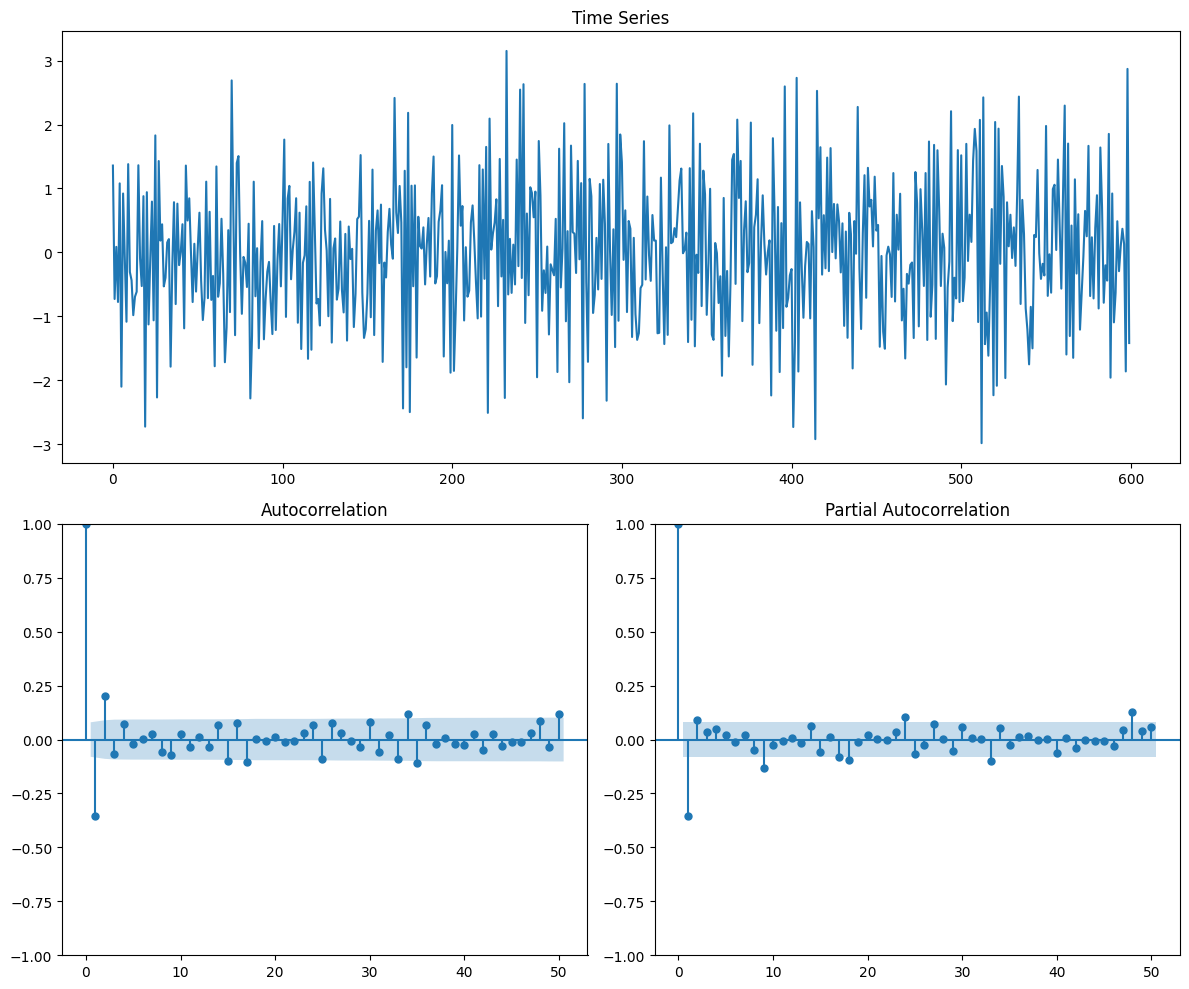

In [21]:
n = 600
ar = np.r_[1, 0.6]
ma = np.r_[1, 0.3]
ar1ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)
plotds(ar1ma1_data)

En esta parte el autoregresivo es de orden 1, al parecer el primer lag posee correlacion. 

In [22]:
from statsmodels.tsa import stattools

In [23]:
adf_result = stattools.adfuller(ar1ma1_data, autolag='AIC')
print('p-value of the ADF test in air miles flown:', adf_result[1])

p-value of the ADF test in air miles flown: 1.9708597737579344e-15


Se evidencia un p-valor <0.05

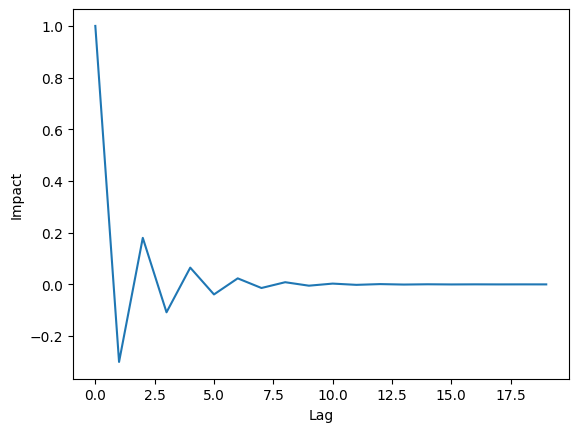

In [24]:
from statsmodels.tsa import arima_process

plt.plot(arima_process.arma_impulse_response(ar, ma, leads=20))
plt.ylabel("Impact");
plt.xlabel("Lag");

Con base en el dato actual y el lag 5, no se establece significancia en el aporte de los datos historicos. 

In [25]:
ar1ma1 = smtsa.ARIMA(ar1ma1_data.tolist(), order=(1, 0, 1)).fit()
ar1ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -870.245
Date:                Sun, 16 Apr 2023   AIC                           1748.489
Time:                        01:59:04   BIC                           1766.077
Sample:                             0   HQIC                          1755.336
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0072      0.033      0.217      0.828      -0.058       0.072
ar.L1         -0.5426      0.094     -5.757      0.000      -0.727      -0.358
ma.L1          0.2149      0.108      1.988      0.047       0.003       0.427
sigma2         1.0647      0.067     15.925      0.000       0.934       1.196
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.37
Prob(Q):                              0.92   Prob(JB):                         0.31
Heteroskedasticity (H):               1.32   Skew:                            -0.00
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Una ilustración de la minimización del AIC
 en el conjunto de datos ARMA (1,1)
 se muestra a continuación:

In [26]:
aicVal=[]

for ari in range(1, 3):
    for maj in range(1,3):
        arma_obj = smtsa.ARIMA(ar1ma1_data.tolist(), order=(ari, 0, maj)).fit()
        aicVal.append([ari, maj, arma_obj.aic])

dfAIC = pd.DataFrame(aicVal, columns=['AR(p)', 'MA(q)', 'AIC'])
dfAIC

,AR(p),MA(q),AIC
0,1,1,1748.489455
1,1,2,1749.676691
2,2,1,1748.254823
3,2,2,1750.254579


El primer AIC es el mas pequeño. 

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [29]:
ibm_df = pd.read_csv('/content/drive/MyDrive/DATASETS/ibm-common-stock-closing-prices.csv')
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'}, inplace=True)
ibm_df=ibm_df.dropna()
ibm_df.head()

,Date,Close_Price
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


El script anterior utiliza pandas para cargar el conjunto de datos. Los nombres de las columnas se renombran utilizando la función rename soportada por pandas DataFrame. El conjunto de datos tiene el siguiente aspecto:

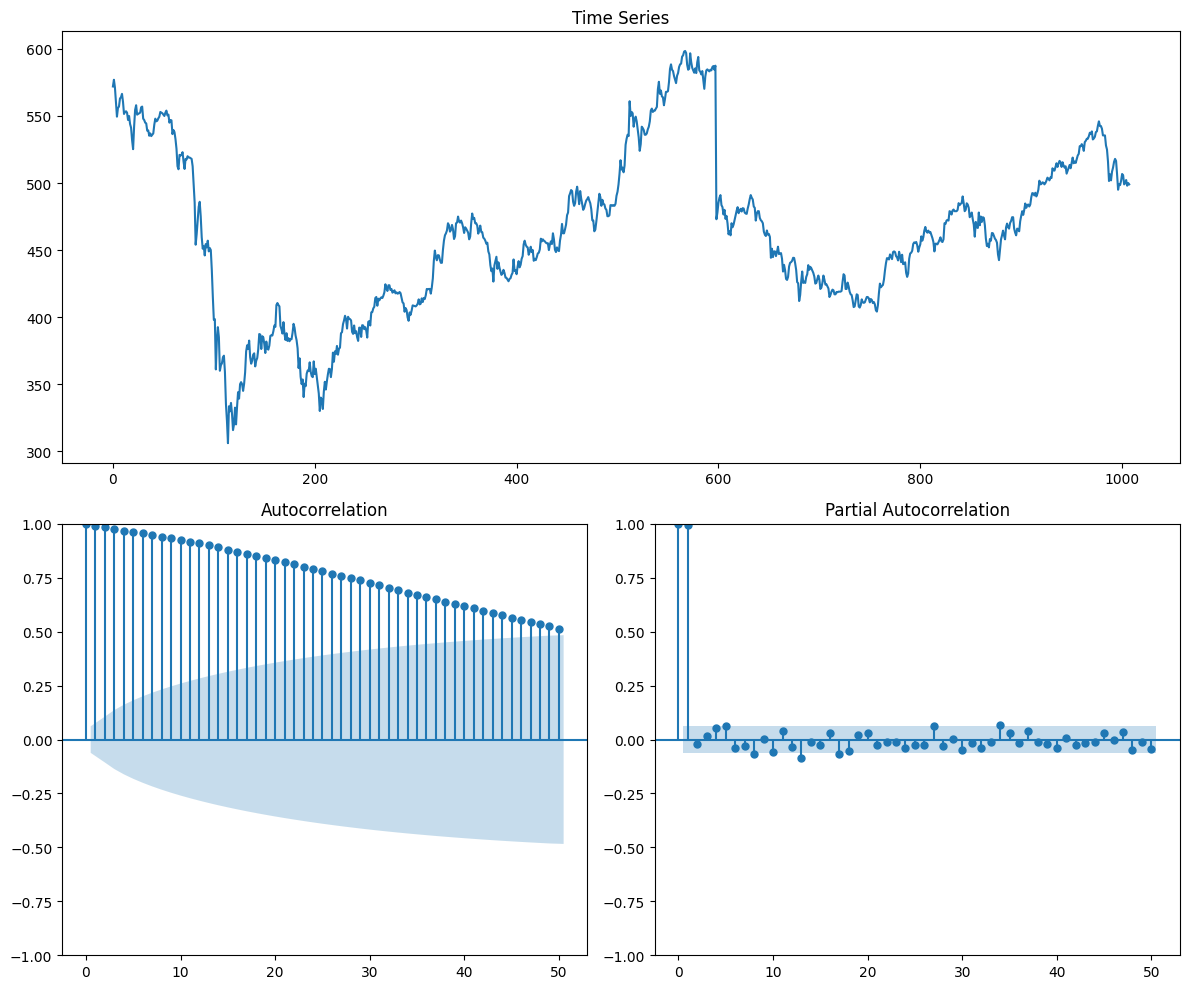

In [30]:
plotds(ibm_df.Close_Price)

No hay estacionaridad. La funcion de autocorrelacion disminuye de manera lineal mostrando un proceso de correlacion en cadena, por otro lado la autocorrelacion parcial solo muestra una autocorrelacion positiva significativa. 

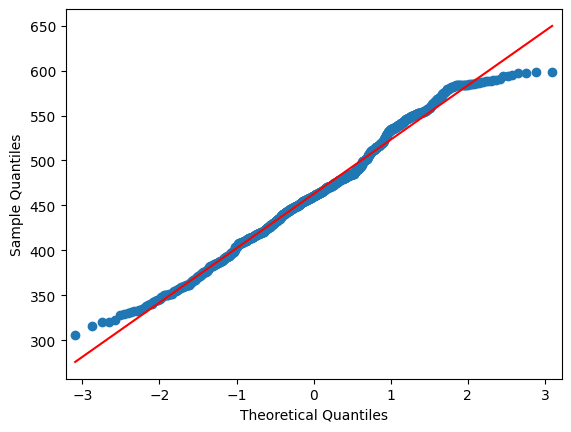

In [31]:
sm.qqplot(ibm_df['Close_Price'], line='s');

La grafica anterior muestra que el conjunto de datos se aproxima a las curvas de campana, con casos extremos que no siguen una distribución normal.

La serie de tiempo no tiene distribucion normal. 

In [32]:
aicVal=[]

for ari in range(1, 3):
    for maj in range(0,3):
        arma_obj = smtsa.ARIMA(ibm_df.Close_Price.tolist(), order=(ari, 0, maj)).fit()
        aicVal.append([ari, maj, arma_obj.aic])

In [33]:
dfAIC = pd.DataFrame(aicVal, columns=['AR(p)', 'MA(q)', 'AIC'])
dfAIC

,AR(p),MA(q),AIC
0,1,0,6697.784241
1,1,1,6699.670009
2,1,2,6701.984008
3,2,0,6699.671126
4,2,1,6700.721956
5,2,2,6702.721949


Para obtener la fila con el menor valor de AIC usamos

In [34]:
dfAIC.nsmallest(n=1, columns="AIC")

,AR(p),MA(q),AIC
0,1,0,6697.784241


El modelo ARMA (1,0) se reajusta como modelo optimo aplicando lo siguiente:

In [35]:
arma_obj_fin = smtsa.ARIMA(ibm_df.Close_Price.tolist(), order=(1, 0, 0)).fit()
ibm_df['ARMA']=arma_obj_fin.predict()

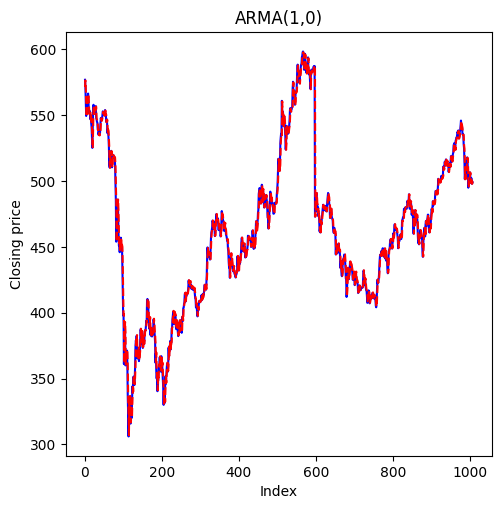

In [36]:
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
ibm_df['Close_Price'].iloc[1:].plot(color='b', linestyle = '-', ax=axarr)
ibm_df['ARMA'].iloc[1:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARMA(1,0)')
plt.xlabel('Index')
plt.ylabel('Closing price');

Grafica de ARMA (1,0)

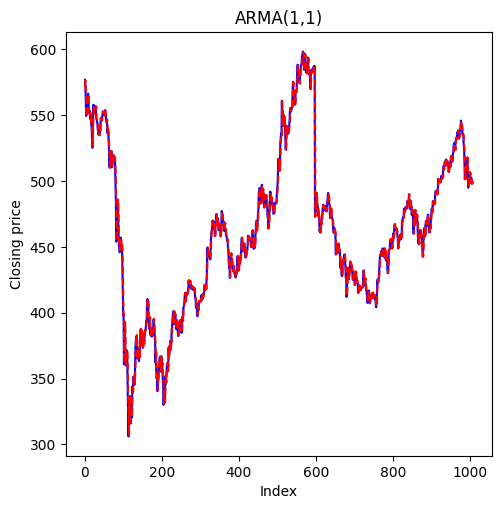

In [37]:
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
ibm_df['Close_Price'].iloc[1:].plot(color='b', linestyle = '-', ax=axarr)
ibm_df['ARMA'].iloc[1:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARMA(1,1)')
plt.xlabel('Index')
plt.ylabel('Closing price');

Grafica de arma (1,1)

Al hacer las visualizaciones de las dos graficas anteriores nos damos cuenta que no es tanta la diferencia entre ellas. 


Tambien es necesario dar a conocer que la parte azul es la original y el ARMA es la roja. 

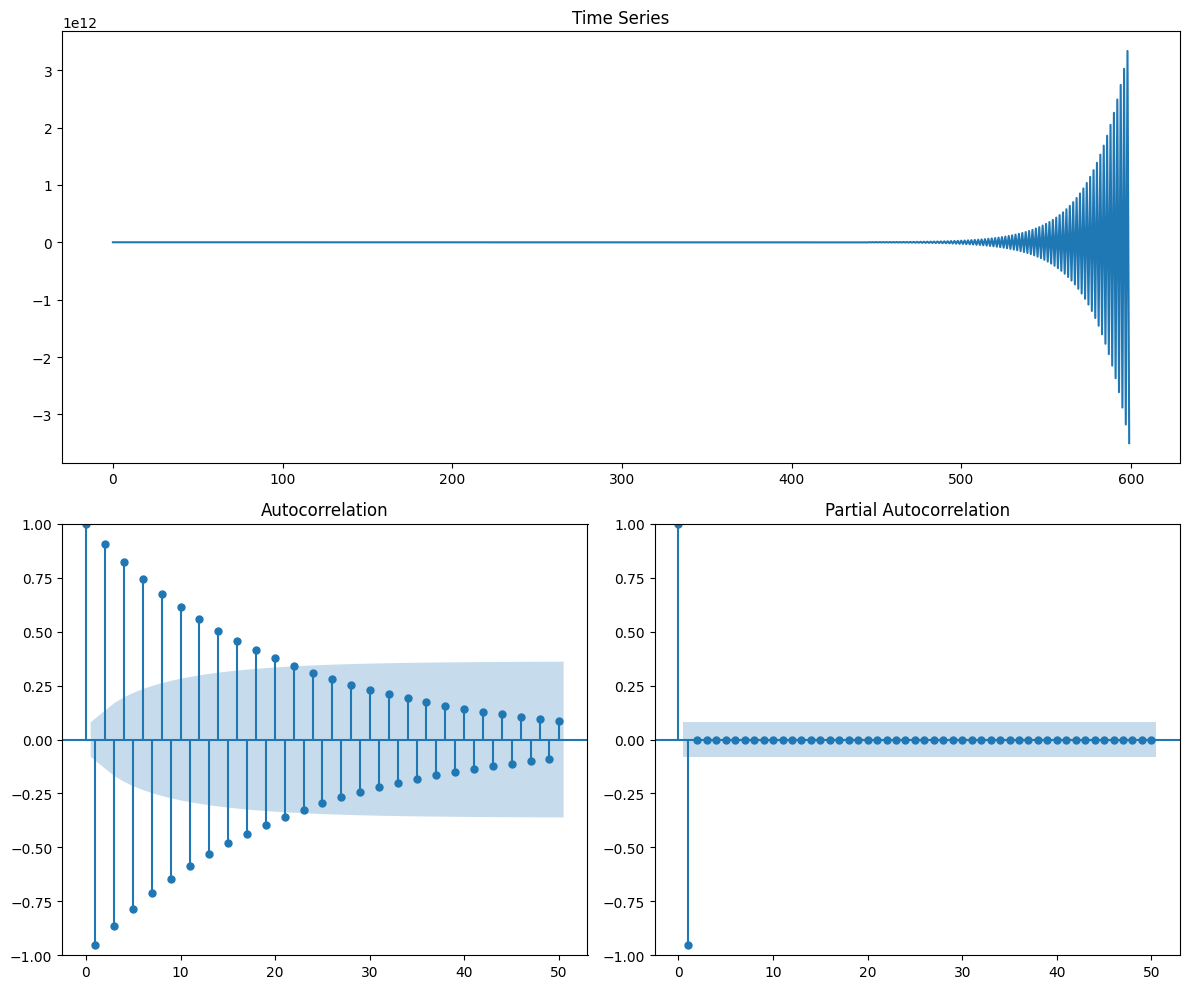

In [38]:
ar = np.r_[1, 1.05]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

En la grafica anterior la varianza del proceso sigue aumentando al final del conjunto de datos y se observa una fuerte tendencia en la ACF. 

Por lo que la serie de tiempo no converge a ningun lado. 

#ARIMA

In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa

In [40]:
djia_df = pd.read_excel('/content/drive/MyDrive/DATASETS/DJIA_Jan2016_Dec2016.xlsx')
djia_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


Analicemos la columna Date y utilicémosla como índice de fila para el DataFrame y utilicemosla como columna

In [41]:
djia_df['Date'] = pd.to_datetime(djia_df['Date'], '%Y-%m-%d')
djia_df.index = djia_df['Date']
djia_df.drop('Date', axis=1, inplace=True)
djia_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


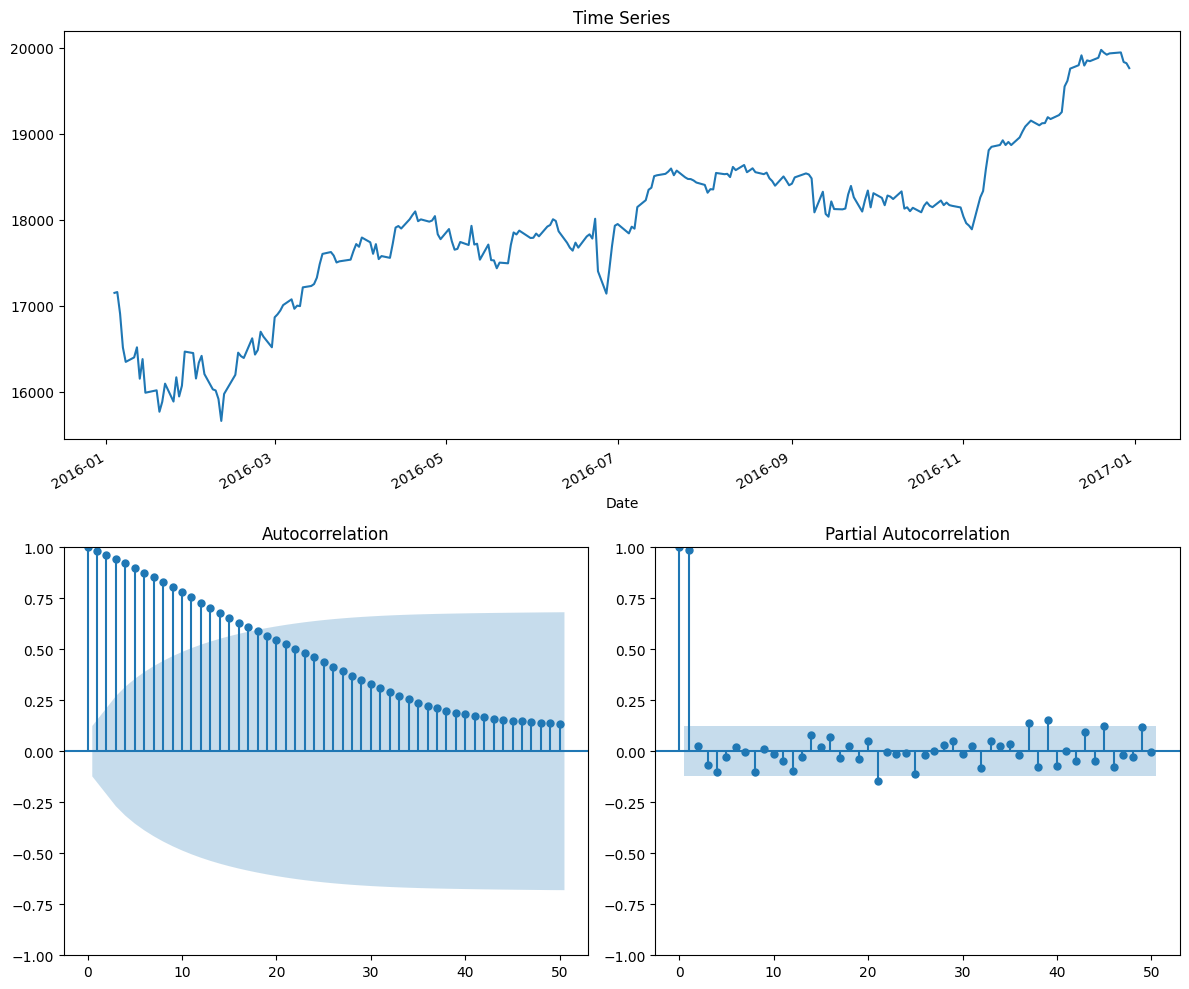

In [42]:
djia_df=djia_df.dropna()
plotds(djia_df['Close'], nlag=50)

El conjunto de datos muestra claramente una señal no estacionaria con una tendencia creciente. El ACF también muestra un decaimiento exponencial, mientras que la PACF tiene una fuerte correlación en el retardo 2.

Dividimos el conjunto de datos del DJIA en dos semestres, de enero a junio de 2016 y de julio a diciembre de 2016, y evaluamos la media y la varianza para cada semestre del siguiente modo:

In [43]:
mean1, mean2 =djia_df.iloc[:125].Close.mean(), djia_df.iloc[125:].Close.mean()
var1, var2 = djia_df.iloc[:125].Close.var(), djia_df.iloc[125:].Close.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=17226.579164, mean2=18616.603593
variance1=487045.734003, variance2=325183.639530


la media y la varianza evaluadas para ambos semestres muestran una diferencia significativa en los valores de la media y la varianza, lo que sugiere que los datos no son estacionarios.

Realicemos la prueba ADF para el conjunto de datos DJIA:

In [44]:
from statsmodels.tsa.stattools import adfuller

In [45]:
adf_result= adfuller(djia_df.Close.tolist())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: -0.462320
p-value: 0.899162


Idealmente, un valor más negativo del estadístico ADF representará una señal estacionaria. Para el conjunto de datos, como el valor p es bastante alto, no podemos rechazar la hipótesis nula, lo que la convierte en una señal no estacionaria.

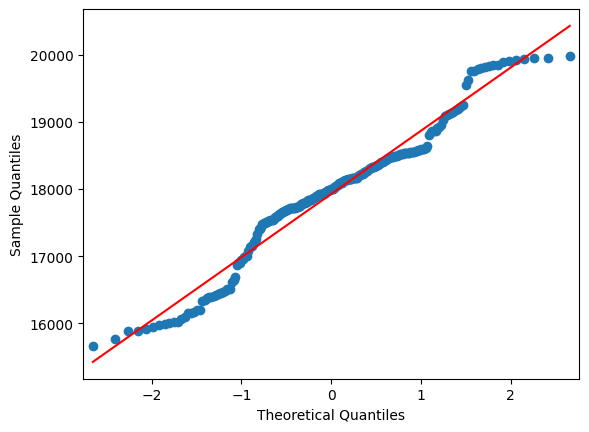

In [46]:
sm.qqplot(djia_df['Close'], line='s');

En la figura anterior visualiza una prueba de normalidad del conjunto de datos DJIA. 

Y se llega a la hipotesis de que no hay normalidad significativa en el conjunto de datos

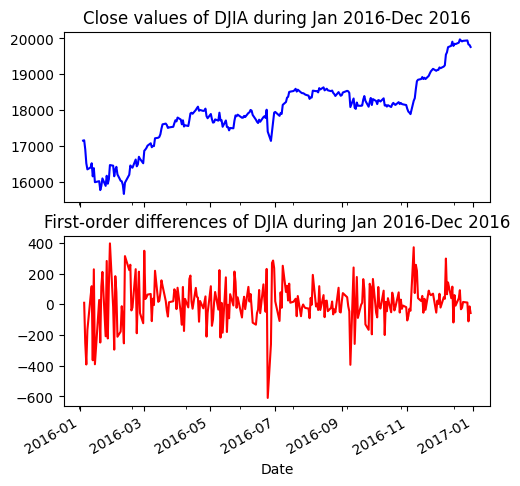

In [47]:
first_order_diff = djia_df['Close'].diff(1).dropna()
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
djia_df['Close'].plot(ax=ax[0], color='b')
ax[0].set_title('Close values of DJIA during Jan 2016-Dec 2016')
first_order_diff.plot(ax=ax[1], color='r')
ax[1].set_title('First-order differences of DJIA during Jan 2016-Dec 2016');

En la grafica anterior se grafican los valores de cierre de DJIA durante enero de 2016 a diciembre de 2016. 

Tambien en la de color rojo se grafica la diferencia de primer orden durante enero de 2016 a diciembre de 2016.

ADF Statistic: -17.135094
p-value: 0.000000


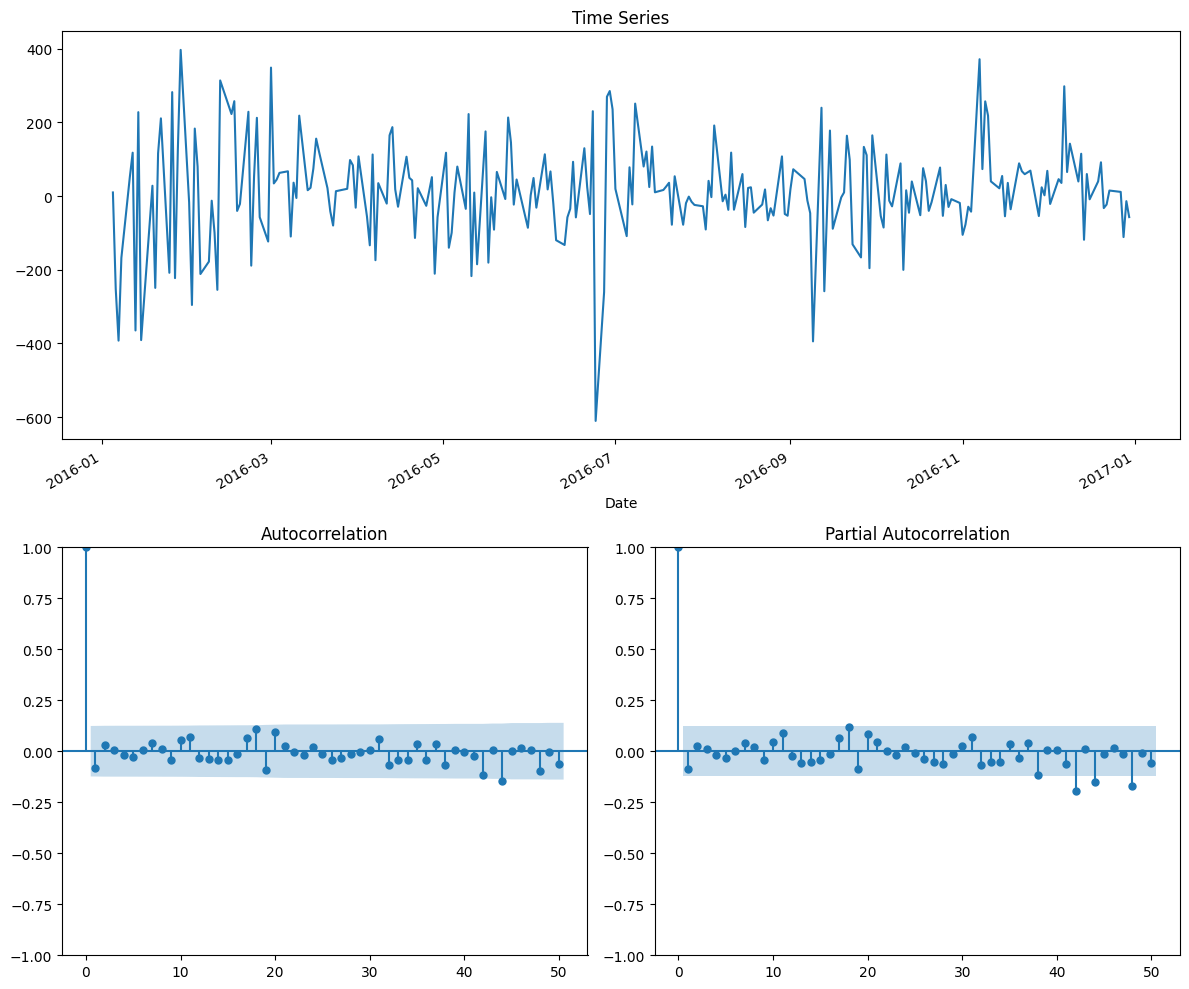

In [48]:
plotds(first_order_diff, nlag=50)
adf_result= adfuller(first_order_diff)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

En la grafica anterior se evidencia que la serie de tiempo  es estacionaria sin embargo, tanto la ACF como el PACF no muestran mucha tendencia del componente de media móvil, mostrando un comportamiento de paseo aleatorio

In [49]:
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = smtsa.ARIMA(djia_df['Close'].tolist(), order=(ari, d, maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass

In [50]:
dfAIC = pd.DataFrame(aicVal, columns=['AR(p)', 'd', 'MA(q)', 'AIC'])
dfAIC

,AR(p),d,MA(q),AIC
0,0,1,0,3182.101860
1,0,1,1,3182.670296
2,0,1,2,3184.581580
3,1,1,0,3182.624230
4,1,1,1,3184.571180
5,1,1,2,3186.467647
6,2,1,0,3184.573347
7,2,1,1,3186.447498
8,2,1,2,3188.433187
9,0,2,0,3362.452244


Los mejores parámetros ARIMA basados ​​en AIC:

In [52]:
print('Best ARIMA parameters based on AIC:\n')
dfAIC[dfAIC.AIC == dfAIC.AIC.min()]

Best ARIMA parameters based on AIC:



,AR(p),d,MA(q),AIC
10,0,2,1,3181.46016


In [53]:
arima_obj = smtsa.ARIMA(djia_df['Close'].tolist(), order=(0, 2, 1))
arima_obj_fit = arima_obj.fit()
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  252
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -1588.730
Date:                Sun, 16 Apr 2023   AIC                           3181.460
Time:                        02:37:44   BIC                           3188.503
Sample:                             0   HQIC                          3184.295
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9983      0.153     -6.535      0.000      -1.298      -0.699
sigma2      1.828e+04   2884.004      6.340      0.000    1.26e+04    2.39e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.60   Jarque-Bera (JB):                47.47
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Configuracion del parametro del modelo. 

In [54]:
pred=np.append([0,0], arima_obj_fit.fittedvalues.tolist())

In [55]:
n_first = pred.shape[0] - djia_df.shape[0]
djia_df['ARIMA']=pred[n_first:]

In [56]:
diffval=np.append([0,0], arima_obj_fit.resid)
djia_df['diffval']=diffval[n_first:]

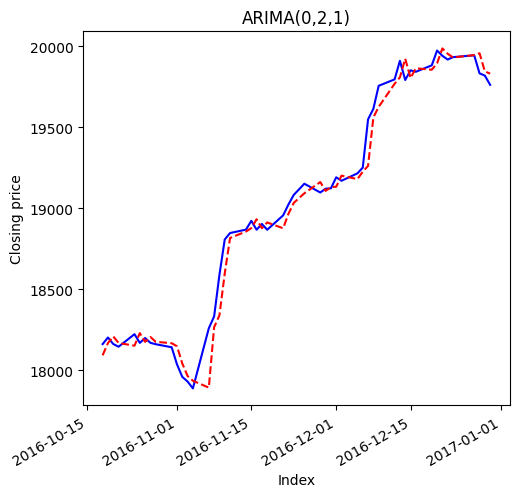

In [57]:
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
djia_df['Close'].iloc[200:].plot(color='b', linestyle = '-', ax=axarr)
djia_df['ARIMA'].iloc[200:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARIMA(0,2,1)')
plt.xlabel('Index')
plt.ylabel('Closing price');

En la grafica anterior se hace una comparacion de los valores reales y los previstos. 

La estacionalidad está presente en la primera diferencia y puede verse utilizando las siguientes líneas de código

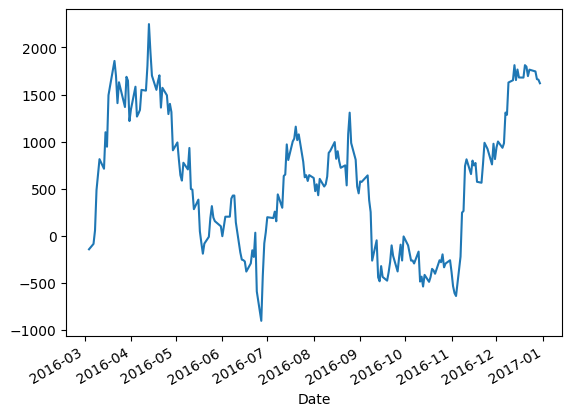

In [58]:
x=djia_df['Close']-djia_df['Close'].shift(42)
x.plot();

La estacionalidad precedente puede corregirse utilizando ARIMA estacional soportado en el modelo statmodels.SARIMAX. El script para configurar un modelo ARIMA estacional para el conjunto de datos DJIA es el siguiente:

In [59]:
x=djia_df['Close']-djia_df['Close'].shift(42)
mod = sm.tsa.statespace.SARIMAX(djia_df['Close'], trend='n', order=(0, 2, 1),
seasonal_order=(1, 1, 1, 42))
sarimax= mod.fit()
sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  252
Model:             SARIMAX(0, 2, 1)x(1, 1, 1, 42)   Log Likelihood               -1366.570
Date:                            Sun, 16 Apr 2023   AIC                           2741.141
Time:                                    02:44:34   BIC                           2754.491
Sample:                                         0   HQIC                          2746.539
                                            - 252                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000     16.163     -0.062      0.951     -32.680      30.680
ar.S.L42      -0.2542      0.093     -2.727      0.006      -0.437      -0.072
ma.S.L42      -0.4671      0.130     -3.597      0.000      -0.722      -0.213
sigma2      2.355e+04    3.8e+05      0.062      0.951   -7.22e+05    7.69e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                21.28
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

El modelo muestra una mejora significativa en términos de AIC y puede optimizarse aún más para diferentes componentes del modelo SARIMAX. 

#Intervalo de confianza

El nivel de confianza de un modelo de previsión viene definido por el parámetro p de la función de previsión. 
El valor p=0.05 representa una estimacion con un 95% de confianza lo que puede interpretarse como que las estimaciones devueltas por el modelo tienen una probabilidad del 5% de no caer en el intervalo de distribución definido. 

In [60]:
forecast = arima_obj_fit.get_forecast(40)
yhat = forecast.predicted_mean
yhat_conf_int = forecast.conf_int(alpha=0.05)

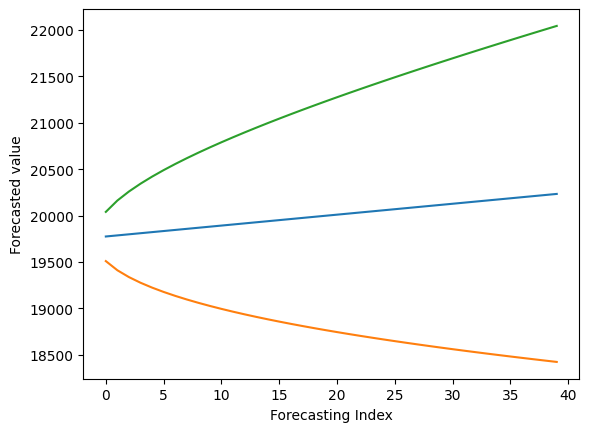

In [61]:
plt.plot(yhat)
plt.plot(yhat_conf_int)
plt.xlabel('Forecasting Index')
plt.ylabel('Forecasted value');